<a href="https://colab.research.google.com/github/Jefffish09/MachineLearning/blob/dev/Classification/binary/bilstm_attention_binary_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Attention, GlobalMaxPooling1D, Concatenate, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, f1_score

In [2]:
seed = 2021
input_dim = 5000
output_dim = 32
max_len = 500
batch_size = 128
epochs = 100
dropout_rate = 0.2
earlystopping_patience = 5

In [3]:
# Load the dataset

(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=input_dim)
x = np.concatenate((x_train, x_valid), axis=0)
y = np.concatenate((y_train, y_valid), axis=0)

print("x shape is {}, y shape is {}".format(x.shape, y.shape))
print("Classes: {}".format(np.unique(y)))
print("Total words: {}".format(len(np.unique(np.hstack(x)))))


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

x shape is (50000,), y shape is (50000,)
Classes: [0 1]
Total words: 4998


In [4]:
# Preprocess the dataset

x_train = pad_sequences(x_train, maxlen=max_len)
x_valid = pad_sequences(x_valid, maxlen=max_len)


In [5]:
def plot_perf(history):
  # Create a plot of accuracy and loss over time
  history_dict = history.history
  history_dict.keys()

  acc = history_dict["accuracy"]
  val_acc = history_dict["val_accuracy"]
  loss = history_dict["loss"]
  val_loss = history_dict["val_loss"]

  epochs = range(1, len(acc) + 1)

  # Training and validation loss
  plt.plot(epochs, loss, "r", label="Training loss")
  # b is for "solid blue line"
  plt.plot(epochs, val_loss, "b", label="Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

  # Training and validation accuracy
  plt.plot(epochs, acc, "r", label="Training acc")
  plt.plot(epochs, val_acc, "b", label="Validation acc")
  plt.title("Training and validation accuracy")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(loc="lower right")
  plt.show()

KFold: 1 starts.
Epoch 1/100
176/176 [==============================] - 61s 155ms/step - loss: 0.6659 - accuracy: 0.5678 - val_loss: 0.4114 - val_accuracy: 0.8065
Epoch 2/100
176/176 [==============================] - 27s 152ms/step - loss: 0.3767 - accuracy: 0.8369 - val_loss: 0.2912 - val_accuracy: 0.8777
Epoch 3/100
176/176 [==============================] - 26s 150ms/step - loss: 0.2521 - accuracy: 0.9014 - val_loss: 0.3097 - val_accuracy: 0.8685
Epoch 4/100
176/176 [==============================] - 26s 150ms/step - loss: 0.2201 - accuracy: 0.9145 - val_loss: 0.2986 - val_accuracy: 0.8772
Epoch 5/100
176/176 [==============================] - 27s 151ms/step - loss: 0.1848 - accuracy: 0.9335 - val_loss: 0.3195 - val_accuracy: 0.8745
Epoch 6/100
176/176 [==============================] - 27s 151ms/step - loss: 0.1522 - accuracy: 0.9465 - val_loss: 0.3092 - val_accuracy: 0.8763
Epoch 7/100
79/79 [==============================] - 2s 19ms/step - loss: 0.2889 - accuracy: 0.8800


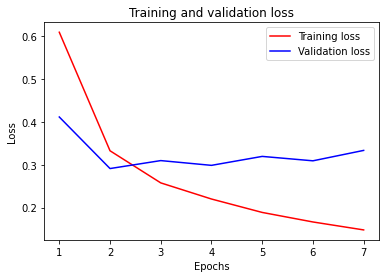

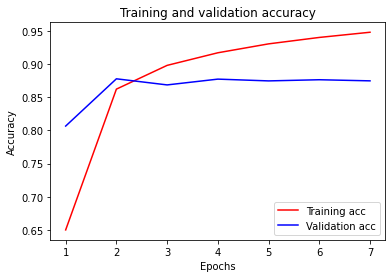

              precision    recall  f1-score   support

           0      0.871     0.886     0.879     12500
           1      0.884     0.869     0.877     12500

    accuracy                          0.878     25000
   macro avg      0.878     0.878     0.878     25000
weighted avg      0.878     0.878     0.878     25000


KFold: 2 starts.
Epoch 1/100
176/176 [==============================] - 30s 155ms/step - loss: 0.6740 - accuracy: 0.5537 - val_loss: 0.3557 - val_accuracy: 0.8560
Epoch 2/100
176/176 [==============================] - 27s 152ms/step - loss: 0.3032 - accuracy: 0.8808 - val_loss: 0.2806 - val_accuracy: 0.8822
Epoch 3/100
176/176 [==============================] - 27s 151ms/step - loss: 0.2260 - accuracy: 0.9170 - val_loss: 0.2853 - val_accuracy: 0.8852
Epoch 4/100
176/176 [==============================] - 27s 152ms/step - loss: 0.1916 - accuracy: 0.9316 - val_loss: 0.3281 - val_accuracy: 0.8629
Epoch 5/100
176/176 [==============================] - 27s 152ms/step -

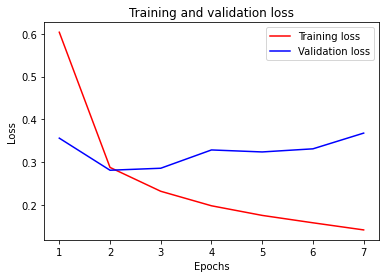

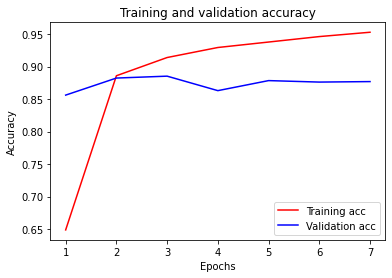

              precision    recall  f1-score   support

           0      0.860     0.913     0.886     12500
           1      0.907     0.851     0.878     12500

    accuracy                          0.882     25000
   macro avg      0.884     0.882     0.882     25000
weighted avg      0.884     0.882     0.882     25000


KFold: 3 starts.
Epoch 1/100
176/176 [==============================] - 30s 155ms/step - loss: 0.6515 - accuracy: 0.5836 - val_loss: 0.3228 - val_accuracy: 0.8614
Epoch 2/100
176/176 [==============================] - 27s 152ms/step - loss: 0.2932 - accuracy: 0.8821 - val_loss: 0.2817 - val_accuracy: 0.8817
Epoch 3/100
176/176 [==============================] - 27s 152ms/step - loss: 0.2279 - accuracy: 0.9162 - val_loss: 0.2817 - val_accuracy: 0.8804
Epoch 4/100
176/176 [==============================] - 27s 151ms/step - loss: 0.1877 - accuracy: 0.9350 - val_loss: 0.3040 - val_accuracy: 0.8796
Epoch 5/100
176/176 [==============================] - 27s 152ms/step -

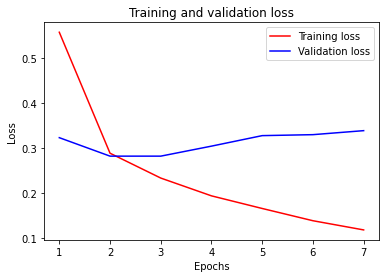

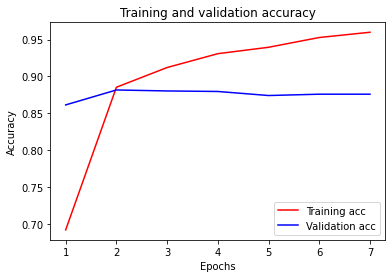

              precision    recall  f1-score   support

           0      0.875     0.890     0.883     12500
           1      0.888     0.873     0.881     12500

    accuracy                          0.882     25000
   macro avg      0.882     0.882     0.882     25000
weighted avg      0.882     0.882     0.882     25000


KFold: 4 starts.
Epoch 1/100
176/176 [==============================] - 30s 154ms/step - loss: 0.6772 - accuracy: 0.5575 - val_loss: 0.6285 - val_accuracy: 0.6454
Epoch 2/100
176/176 [==============================] - 26s 150ms/step - loss: 0.6256 - accuracy: 0.6377 - val_loss: 0.5588 - val_accuracy: 0.6852
Epoch 3/100
176/176 [==============================] - 27s 153ms/step - loss: 0.4940 - accuracy: 0.7746 - val_loss: 0.3963 - val_accuracy: 0.8217
Epoch 4/100
176/176 [==============================] - 27s 151ms/step - loss: 0.3587 - accuracy: 0.8497 - val_loss: 0.3252 - val_accuracy: 0.8599
Epoch 5/100
176/176 [==============================] - 27s 152ms/step -

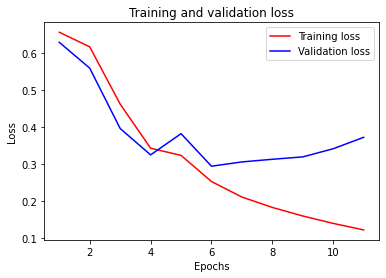

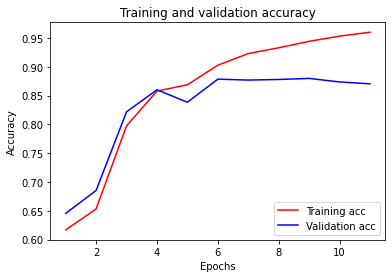

              precision    recall  f1-score   support

           0      0.889     0.865     0.877     12500
           1      0.869     0.892     0.880     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 5 starts.
Epoch 1/100
176/176 [==============================] - 30s 158ms/step - loss: 0.6757 - accuracy: 0.5521 - val_loss: 0.3501 - val_accuracy: 0.8508
Epoch 2/100
176/176 [==============================] - 27s 152ms/step - loss: 0.3045 - accuracy: 0.8791 - val_loss: 0.2772 - val_accuracy: 0.8841
Epoch 3/100
176/176 [==============================] - 26s 151ms/step - loss: 0.2236 - accuracy: 0.9185 - val_loss: 0.2817 - val_accuracy: 0.8815
Epoch 4/100
176/176 [==============================] - 27s 151ms/step - loss: 0.1918 - accuracy: 0.9306 - val_loss: 0.3060 - val_accuracy: 0.8812
Epoch 5/100
176/176 [==============================] - 26s 151ms/step -

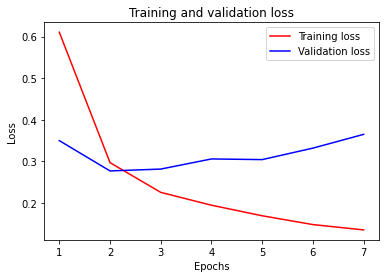

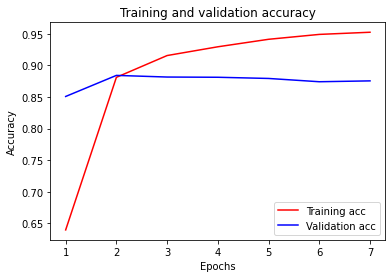

              precision    recall  f1-score   support

           0      0.889     0.878     0.883     12500
           1      0.880     0.890     0.885     12500

    accuracy                          0.884     25000
   macro avg      0.884     0.884     0.884     25000
weighted avg      0.884     0.884     0.884     25000


KFold: 6 starts.
Epoch 1/100
176/176 [==============================] - 30s 155ms/step - loss: 0.6637 - accuracy: 0.5711 - val_loss: 0.3626 - val_accuracy: 0.8382
Epoch 2/100
176/176 [==============================] - 27s 152ms/step - loss: 0.3127 - accuracy: 0.8767 - val_loss: 0.2901 - val_accuracy: 0.8782
Epoch 3/100
176/176 [==============================] - 27s 151ms/step - loss: 0.2280 - accuracy: 0.9146 - val_loss: 0.2903 - val_accuracy: 0.8792
Epoch 4/100
176/176 [==============================] - 27s 151ms/step - loss: 0.1804 - accuracy: 0.9363 - val_loss: 0.2906 - val_accuracy: 0.8793
Epoch 5/100
176/176 [==============================] - 27s 152ms/step -

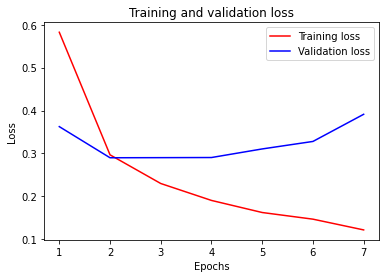

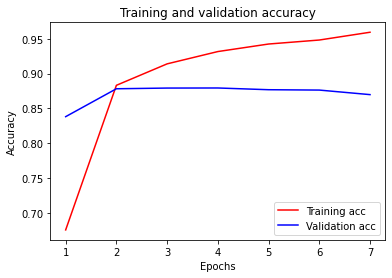

              precision    recall  f1-score   support

           0      0.898     0.853     0.875     12500
           1      0.860     0.903     0.881     12500

    accuracy                          0.878     25000
   macro avg      0.879     0.878     0.878     25000
weighted avg      0.879     0.878     0.878     25000


KFold: 7 starts.
Epoch 1/100
176/176 [==============================] - 30s 156ms/step - loss: 0.6583 - accuracy: 0.5725 - val_loss: 0.3665 - val_accuracy: 0.8482
Epoch 2/100
176/176 [==============================] - 27s 152ms/step - loss: 0.3230 - accuracy: 0.8675 - val_loss: 0.2901 - val_accuracy: 0.8812
Epoch 3/100
176/176 [==============================] - 27s 153ms/step - loss: 0.2309 - accuracy: 0.9125 - val_loss: 0.2911 - val_accuracy: 0.8797
Epoch 4/100
176/176 [==============================] - 27s 151ms/step - loss: 0.1959 - accuracy: 0.9278 - val_loss: 0.2914 - val_accuracy: 0.8804
Epoch 5/100
176/176 [==============================] - 27s 153ms/step -

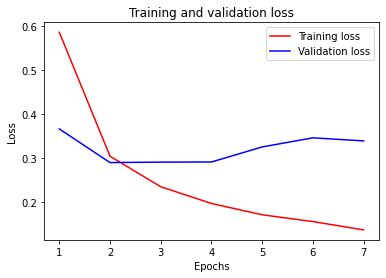

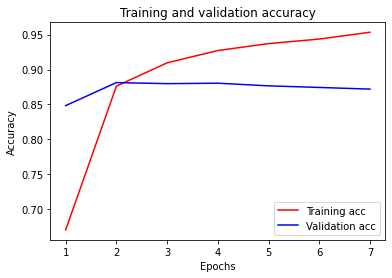

              precision    recall  f1-score   support

           0      0.869     0.898     0.883     12500
           1      0.894     0.865     0.879     12500

    accuracy                          0.881     25000
   macro avg      0.882     0.881     0.881     25000
weighted avg      0.882     0.881     0.881     25000


KFold: 8 starts.
Epoch 1/100
176/176 [==============================] - 30s 155ms/step - loss: 0.6584 - accuracy: 0.5656 - val_loss: 0.3232 - val_accuracy: 0.8616
Epoch 2/100
176/176 [==============================] - 27s 153ms/step - loss: 0.2870 - accuracy: 0.8887 - val_loss: 0.2818 - val_accuracy: 0.8821
Epoch 3/100
176/176 [==============================] - 27s 153ms/step - loss: 0.2132 - accuracy: 0.9198 - val_loss: 0.2795 - val_accuracy: 0.8832
Epoch 4/100
176/176 [==============================] - 27s 152ms/step - loss: 0.1810 - accuracy: 0.9365 - val_loss: 0.2875 - val_accuracy: 0.8805
Epoch 5/100
176/176 [==============================] - 27s 153ms/step -

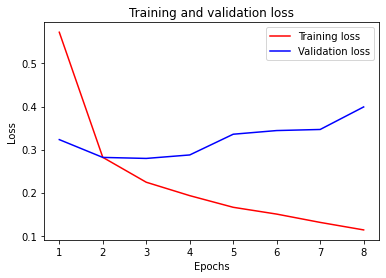

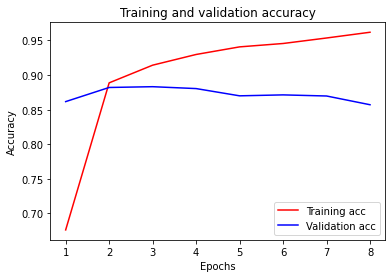

              precision    recall  f1-score   support

           0      0.873     0.897     0.885     12500
           1      0.894     0.869     0.882     12500

    accuracy                          0.883     25000
   macro avg      0.884     0.883     0.883     25000
weighted avg      0.884     0.883     0.883     25000


KFold: 9 starts.
Epoch 1/100
176/176 [==============================] - 31s 157ms/step - loss: 0.6716 - accuracy: 0.5662 - val_loss: 0.3792 - val_accuracy: 0.8286
Epoch 2/100
176/176 [==============================] - 27s 154ms/step - loss: 0.3480 - accuracy: 0.8575 - val_loss: 0.2842 - val_accuracy: 0.8791
Epoch 3/100
176/176 [==============================] - 27s 152ms/step - loss: 0.2362 - accuracy: 0.9116 - val_loss: 0.2940 - val_accuracy: 0.8714
Epoch 4/100
176/176 [==============================] - 27s 153ms/step - loss: 0.1960 - accuracy: 0.9286 - val_loss: 0.3030 - val_accuracy: 0.8784
Epoch 5/100
176/176 [==============================] - 27s 153ms/step -

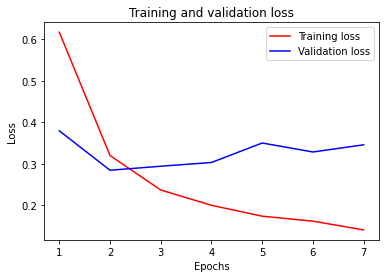

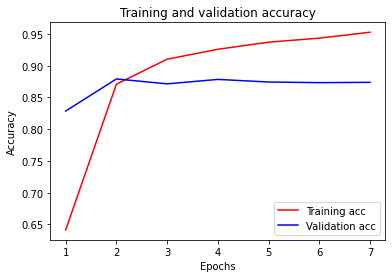

              precision    recall  f1-score   support

           0      0.880     0.878     0.879     12500
           1      0.878     0.880     0.879     12500

    accuracy                          0.879     25000
   macro avg      0.879     0.879     0.879     25000
weighted avg      0.879     0.879     0.879     25000


KFold: 10 starts.
Epoch 1/100
176/176 [==============================] - 30s 156ms/step - loss: 0.6665 - accuracy: 0.5592 - val_loss: 0.3827 - val_accuracy: 0.8380
Epoch 2/100
176/176 [==============================] - 27s 154ms/step - loss: 0.3462 - accuracy: 0.8576 - val_loss: 0.2845 - val_accuracy: 0.8800
Epoch 3/100
176/176 [==============================] - 27s 153ms/step - loss: 0.2397 - accuracy: 0.9110 - val_loss: 0.2931 - val_accuracy: 0.8781
Epoch 4/100
176/176 [==============================] - 27s 152ms/step - loss: 0.2012 - accuracy: 0.9264 - val_loss: 0.2960 - val_accuracy: 0.8824
Epoch 5/100
176/176 [==============================] - 27s 154ms/step 

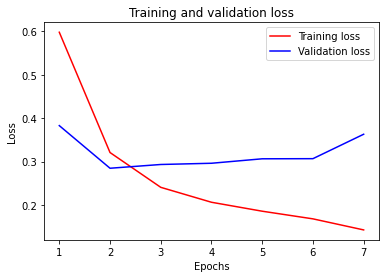

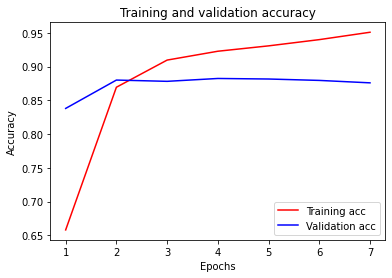

              precision    recall  f1-score   support

           0      0.893     0.863     0.878     12500
           1      0.868     0.897     0.882     12500

    accuracy                          0.880     25000
   macro avg      0.880     0.880     0.880     25000
weighted avg      0.880     0.880     0.880     25000


Average accuracy: 0.8848 (+/- 0.0052)
Average loss: 0.2838 (+/- 0.0094)
Average F1: 0.8804 (+/- 0.0021)


In [6]:
# Create and train the model

earlystop_callback = EarlyStopping(
  monitor="val_loss",
  min_delta=0.0001,
  patience=earlystopping_patience,
  restore_best_weights=True)

kfold = StratifiedKFold(n_splits=10, random_state=seed, shuffle=True)
model = None
cv_acc = []
cv_loss = []
cv_f1 = []
n = 1
for train, valid in kfold.split(x_train, y_train):
  
  print("KFold: {} starts.".format(n))
  del model
  tf.keras.backend.clear_session()
  
  inputs = Input(shape=(None,), dtype="int32")
  embeddings = Embedding(input_dim=input_dim, output_dim=output_dim)(inputs)
  bilstm = Bidirectional(LSTM(units=100, dropout=0.2, activation="tanh", recurrent_dropout=0.0, recurrent_activation="sigmoid", unroll=False, use_bias=True, return_sequences=True))(embeddings)
  attention_layer = Attention()([bilstm, bilstm])
  pooling_out1 = GlobalMaxPooling1D()(bilstm)
  pooling_out2 = GlobalMaxPooling1D()(attention_layer)
  merge = Concatenate()([pooling_out1, pooling_out2])
  mlp_hidden_out = Dense(units=64, activation="relu")(merge)
  mlp_hidden_out = Dropout(rate=0.5)(mlp_hidden_out)
  outputs = Dense(units=1, activation="sigmoid")(mlp_hidden_out)
  model = Model(inputs=inputs, outputs=outputs)

  model.compile(
      loss="binary_crossentropy",
      optimizer="adam",
      metrics=["accuracy"]
  )

  # model.summary()

  history = model.fit(
      x=x_train[train],
      y=y_train[train],
      validation_data=(x_valid, y_valid),
      batch_size=batch_size,
      epochs=epochs,
      verbose=1,
      callbacks=[earlystop_callback]
  )

  loss, acc = model.evaluate(x=x_train[valid], y=y_train[valid], verbose=1)
  cv_acc.append(acc)
  cv_loss.append(loss)

  plot_perf(history)

  # np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).
  # (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).
  y_pred = (model.predict(x_valid) > 0.5).astype("int32")
  report = classification_report(y_true=y_valid, y_pred=y_pred, digits=3, output_dict=False)
  print(report)

  f1 = f1_score(y_true=y_valid, y_pred=y_pred, average="binary")
  cv_f1.append(f1)

  print("")
  n += 1

print("Average accuracy: {:.4f} (+/- {:.4f})".format(np.mean(cv_acc), np.std(cv_acc)))
print("Average loss: {:.4f} (+/- {:.4f})".format(np.mean(cv_loss), np.std(cv_loss)))
print("Average F1: {:.4f} (+/- {:.4f})".format(np.mean(cv_f1), np.std(cv_f1)))
